In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV


   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

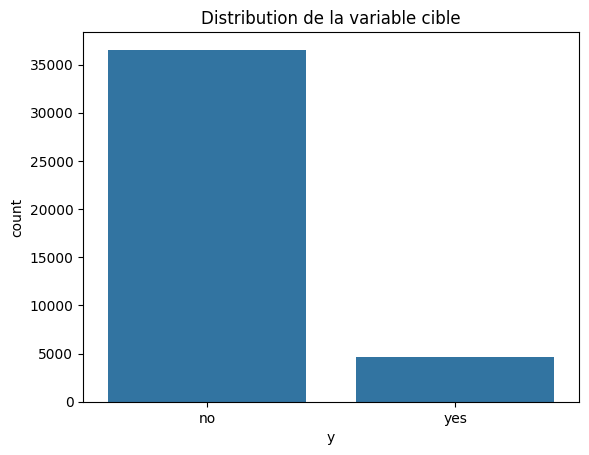

In [48]:
# Charger les données
df = pd.read_csv('/content/bank-additional-full.csv', sep=';')

# Aperçu des données
print(df.head())

# Informations sur les données
print(df.info())

# Statistiques descriptives
print(df.describe())

# Visualisation de la distribution de la variable cible
sns.countplot(x='y', data=df)
plt.title('Distribution de la variable cible')
plt.show()


In [49]:
# Convertir les variables catégorielles en variables numériques
df = pd.get_dummies(df, drop_first=True)

# Séparation des caractéristiques (features) et de la variable cible (target)
X = df.drop('y_yes', axis=1)
y = df['y_yes']

# Standardisation des données
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [51]:
model = LogisticRegression(solver='liblinear')  # ou utilisez max_iter=1000
model.fit(X_train, y_train)


LogisticRegression(solver='liblinear')

In [53]:
y_pred = model.predict(X_test)

# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Rapport de classification
print(classification_report(y_test, y_pred))


[[10685   283]
 [  801   588]]
              precision    recall  f1-score   support

       False       0.93      0.97      0.95     10968
        True       0.68      0.42      0.52      1389

    accuracy                           0.91     12357
   macro avg       0.80      0.70      0.74     12357
weighted avg       0.90      0.91      0.90     12357



In [54]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear']  # Utiliser uniquement liblinear pour éviter les problèmes de convergence
}

grid = GridSearchCV(LogisticRegression(), param_grid, refit=True, verbose=2)
grid.fit(X_train, y_train)

print(grid.best_params_)
print(grid.best_estimator_)


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ............................C=0.1, solver=liblinear; total time=   0.5s
[CV] END ............................C=0.1, solver=liblinear; total time=   0.8s
[CV] END ............................C=0.1, solver=liblinear; total time=   0.9s
[CV] END ............................C=0.1, solver=liblinear; total time=   0.9s
[CV] END ............................C=0.1, solver=liblinear; total time=   0.7s
[CV] END ..............................C=1, solver=liblinear; total time=   1.2s
[CV] END ..............................C=1, solver=liblinear; total time=   0.8s
[CV] END ..............................C=1, solver=liblinear; total time=   0.9s
[CV] END ..............................C=1, solver=liblinear; total time=   1.0s
[CV] END ..............................C=1, solver=liblinear; total time=   1.0s
[CV] END .............................C=10, solver=liblinear; total time=   1.3s
[CV] END .............................C=10, solve